In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import math
import random
from sklearn.utils import shuffle
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ImageData=np.genfromtxt('MNISTnumImages5000_balanced.txt', delimiter='\t')
ImageDataLabels=np.genfromtxt('MNISTnumLabels5000_balanced.txt')

f=open("MNISTnumImages5000_balanced.txt","r")
lines=f.readlines()
N=-1
ft=open("input.txt","w")
for i in range(0,5000):
    if i%500==0:
        N+=1
    ft.write(lines[i][:len(lines[i])-1]+"\t"+str(N)+"\n")
ft.close()

ft=open("input.txt","r")
lines_ft=ft.readlines()
N=0
for i in range(0,5000, 500):
    file= 'F'+str(N)
    file=open((str(file)+".txt"),"w")
    file.writelines(lines_ft[i:i+500])
    N+=1
    file.close()

K=0

f_train=open("train.txt","w")
f_test=open("test.txt","w")

for i in range(0,10):
    file= 'F'+str(i)
    file=open((str(file)+".txt"),"r")
    filelines=file.readlines()
    f_train.writelines(filelines[0:400])
    f_test.writelines(filelines[400:500])
file.close()
f_train.close()
f_train.close()

trainData = np.genfromtxt('train.txt', delimiter='\t')
TrainData, TrainDataLabels = trainData[:, :784], trainData[:, 784]
TrainDataLabels = TrainDataLabels.astype(np.int32)
TrainData_withoutshuffle=TrainData
TrainDataLabels_withoutshuffle=TrainDataLabels

testData = np.genfromtxt('test.txt', delimiter='\t')
TestData, TestDataLabels = testData[:, :784], testData[:, 784]
TestDataLabels = TestDataLabels.astype(np.int32)

In [3]:
No_Of_HiddenLayers= int(input('Enter no of hidden layers :'))
Hidden_Layer_Neurons = np.zeros((No_Of_HiddenLayers+2))
Hidden_Layer_Neurons[0]=784
for i in range(1, No_Of_HiddenLayers+1):
    Hidden_Layer_Neurons[i]=int(input('Enter no of Neurons :'))
Hidden_Layer_Neurons[No_Of_HiddenLayers+1]=784
Hidden_Layer_Neurons=list(Hidden_Layer_Neurons.astype(int))

Enter no of hidden layers :1
Enter no of Neurons :190


In [4]:
#intializing weights 
Weights=[]
for i in range(0, len(Hidden_Layer_Neurons)-1):
        temp_wghts = np.empty((Hidden_Layer_Neurons[i]+1,Hidden_Layer_Neurons[i+1]))
        for inp in range(0,Hidden_Layer_Neurons[i]+1):
            for out in range(Hidden_Layer_Neurons[i+1]):
                temp_wghts[inp,out] = random.uniform(-0.8,0.8)
        Weights.append(temp_wghts)

print(Weights[0].shape)
#creating empty delta Wts matrix
del_wts = []
for i in range(0,len(Hidden_Layer_Neurons)-1):
    temp = np.empty((Hidden_Layer_Neurons[i]+1,Hidden_Layer_Neurons[i+1]))
    for j in range(0,Hidden_Layer_Neurons[i]+1):
        for k in range(Hidden_Layer_Neurons[i+1]):
            temp[j,k] = 0
    del_wts.append(temp)
del_t = del_wts

(785, 190)


In [5]:
def forward(x, w):
    Out_List=[]
    for j in range(0,len(w)):
        one = np.ones((len(x),1))
        x = np.append(one,x,axis=1)
        x = np.matmul(x,w[j])
        x = 1/(1+np.exp(-x))
        Out_List.append(x)
    return x, Out_List
    
def Err_Fracts(Yhat, Y):
    error_list=[]
    y_predLabels=[]
    error=0
    for i in range(0,len(Y)):
        y_pred = np.argmax(Yhat[i,:])
        y_predLabels.append(y_pred)
        if Y[i] == y_pred:
            pass
        else:
            error += 1
    error_list.append(error/len(Y))
    
    return y_predLabels, error_list

In [6]:
#Hyperparameters
lr=0.01
alpha=0.8
Epochs=350

Epoch : 0
Training error fraction is: 21.57458716318336
Epoch : 10
Training error fraction is: 4.96020182851843
Epoch : 20
Training error fraction is: 3.4809792747101387
Epoch : 30
Training error fraction is: 2.822556814376575
Epoch : 40
Training error fraction is: 2.4468265734157777
Epoch : 50
Training error fraction is: 2.1898522608847086
Epoch : 60
Training error fraction is: 2.0168910106983495
Epoch : 70
Training error fraction is: 1.9238879892436591
Epoch : 80
Training error fraction is: 1.7991726160837096
Epoch : 90
Training error fraction is: 1.6823687776592795
Epoch : 100
Training error fraction is: 1.6136059658309627
Epoch : 110
Training error fraction is: 1.5738602663976595
Epoch : 120
Training error fraction is: 1.4999834327930197
Epoch : 130
Training error fraction is: 1.43841671061193
Epoch : 140
Training error fraction is: 1.4215292054997768
Epoch : 150
Training error fraction is: 1.3846287853920478
Epoch : 160
Training error fraction is: 1.3254633168058738
Epoch : 170
Tr

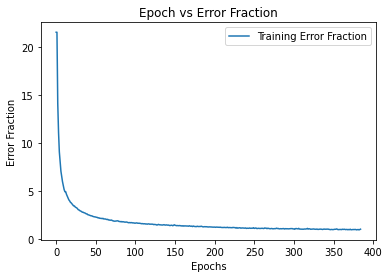

In [7]:
error_Train=[]
error_Test=[]
# Gradient descent 
Weights_Train=Weights
for e in range(0, Epochs):
    TrainData, TrainDataLabels = shuffle(np.array(TrainData), np.array(TrainDataLabels))

    inputs=TrainData
    er=0
    for i in range(0, len(inputs)):        
        output=[inputs[i]]
        y = inputs[i]
        
        Z=inputs[i]
        
        for j in range(0,len(Weights_Train)):
            Z = np.hstack(([1],Z))
            Current_Layer = np.array(Weights_Train[j])
            Z = np.matmul(Z,Current_Layer)
            Z = 1/(1+np.exp(-Z))
            output.append(Z)
            
        y_hat=Z
        d_output = np.multiply((y_hat),(1-y_hat))
        
       
        error=np.array((y-y_hat))
        d_output=np.multiply(d_output, error)
        t_dOut=d_output
        d_output=d_output.reshape((1,784))
        d_output=d_output.tolist()
        
        for j in range(-1,-len(Weights_Train),-1):
            Current_Layer = Weights_Train[j]
            t_dOut = np.matmul(Current_Layer[1:,:],t_dOut)
            t_dOut = np.multiply(t_dOut,output[j-1])
            t_dOut = np.multiply(t_dOut,(1-output[j-1]))
            d_output.append(t_dOut)
        d_output = d_output[::-1]
        delt = []
        
        for j in range(0,len(Weights_Train)):
            logits = output[j]
            logits = np.hstack(([1],logits))
            logits = np.reshape(logits,(len(logits),1))
            del_layer = np.reshape(d_output[j],(1,len(d_output[j])))
            del_wts = np.matmul(logits,del_layer)
            del_wts = np.multiply(lr,del_wts)
            delt.append(del_wts)
        
        for j in range(0,len(Weights_Train)):
            if i == 0:
                del_t[j] = delt[j]
            else:
                del_t[j] = delt[j] + np.multiply(alpha,del_t[j]) 
                
        for j in range(0,len(Weights_Train)):
            Weights_Train[j] = Weights_Train[j]+del_t[j]
        
            
    er = 0
    train_input = TrainData
    true_img = train_input

    reconstr_img, OutList_Test_atrain=forward(train_input, Weights_Train)


    er = np.multiply((true_img-reconstr_img),(true_img-reconstr_img))
    er = er.sum()
    error_Train.append(er/4000)

    if e%10==0:  
        print("Epoch :", e)
        print("Training error fraction is:", er/len(inputs))
        error_Train.append(er/len(inputs))
plt.plot(range(len(error_Train)),error_Train,label='Training Error Fraction')  
plt.title("Epoch vs Error Fraction")
plt.xlabel("Epochs")
plt.ylabel("Error Fraction")
plt.legend()        

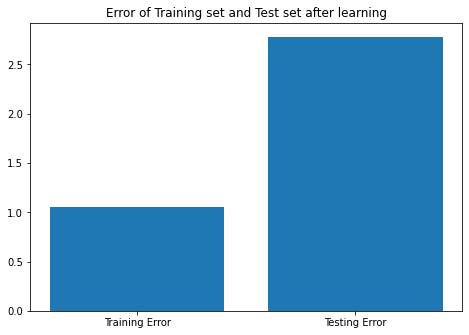

In [12]:
test_input= TestData
test_out= TestData
train_in=TrainData
train_out=TrainData

test_pred, OutList_Test_atrain=forward(test_input, Weights_Train)
train_pred, OutList_Test_atrain=forward(train_input, Weights_Train)

y_test_digits=test_pred[0, :]
test_out_digits=test_out[0 , :]

for j in range(1,10):
    i = j*100
    test_out_digits = np.vstack((test_out_digits,test_out[i,:]))
    y_test_digits = np.vstack((y_test_digits,test_pred[i,:]))
    
train_error = np.multiply((train_out-train_pred),(train_out-train_pred))
test_error = np.multiply((test_out-test_pred),(test_out-test_pred))
train_error_frac = train_error.sum()/4000
test_error_frac = test_error.sum()/1000

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Error of Training set and Test set after learning")
ax.bar(['Training Error','Testing Error'],[train_error_frac,test_error_frac])
plt.show()


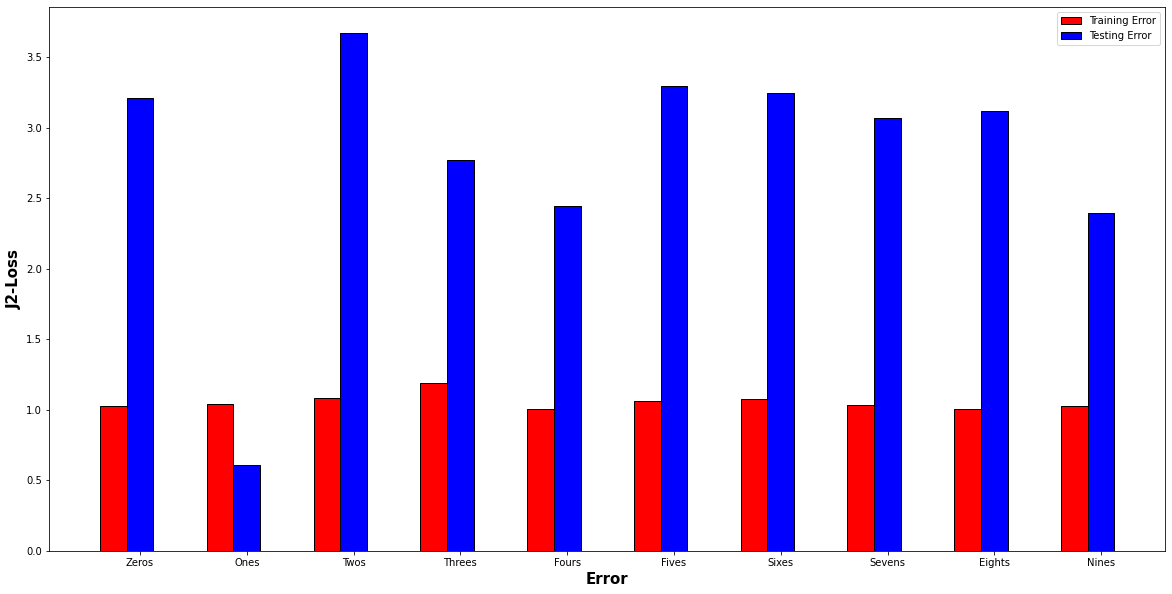

In [13]:
Digits_Train_error=[]
Digits_Test_error=[]
for d in range(0, 10):
    trainidx=d*400
    testidx=d*100
    err_train=train_error[trainidx : trainidx+400, :]
    err_test=test_error[testidx : testidx+100, :]
    err_train=err_train.sum()/400
    err_test=err_test.sum()/100
    Digits_Train_error=np.append(Digits_Train_error, [err_train], axis = 0).tolist()
    Digits_Test_error=np.append(Digits_Test_error, [err_test], axis = 0).tolist()


barWidth=0.25
fig = plt.subplots(figsize =(20,10))
bar1 = np.arange(10)
bar2 = [x + barWidth for x in bar1]

plt.bar(bar1, Digits_Train_error, color ='r', width = barWidth,
        edgecolor ='black', label ='Training Error')
plt.bar(bar2, Digits_Test_error, color ='b', width = barWidth,
        edgecolor ='black', label ='Testing Error')

plt.xlabel('Error', fontweight ='bold', fontsize = 15)
plt.ylabel('J2-Loss', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(10)],
        ['Zeros', 'Ones', 'Twos', 'Threes', 'Fours', 'Fives', 'Sixes', 'Sevens', 'Eights', 'Nines'])
plt.legend()
plt.show()


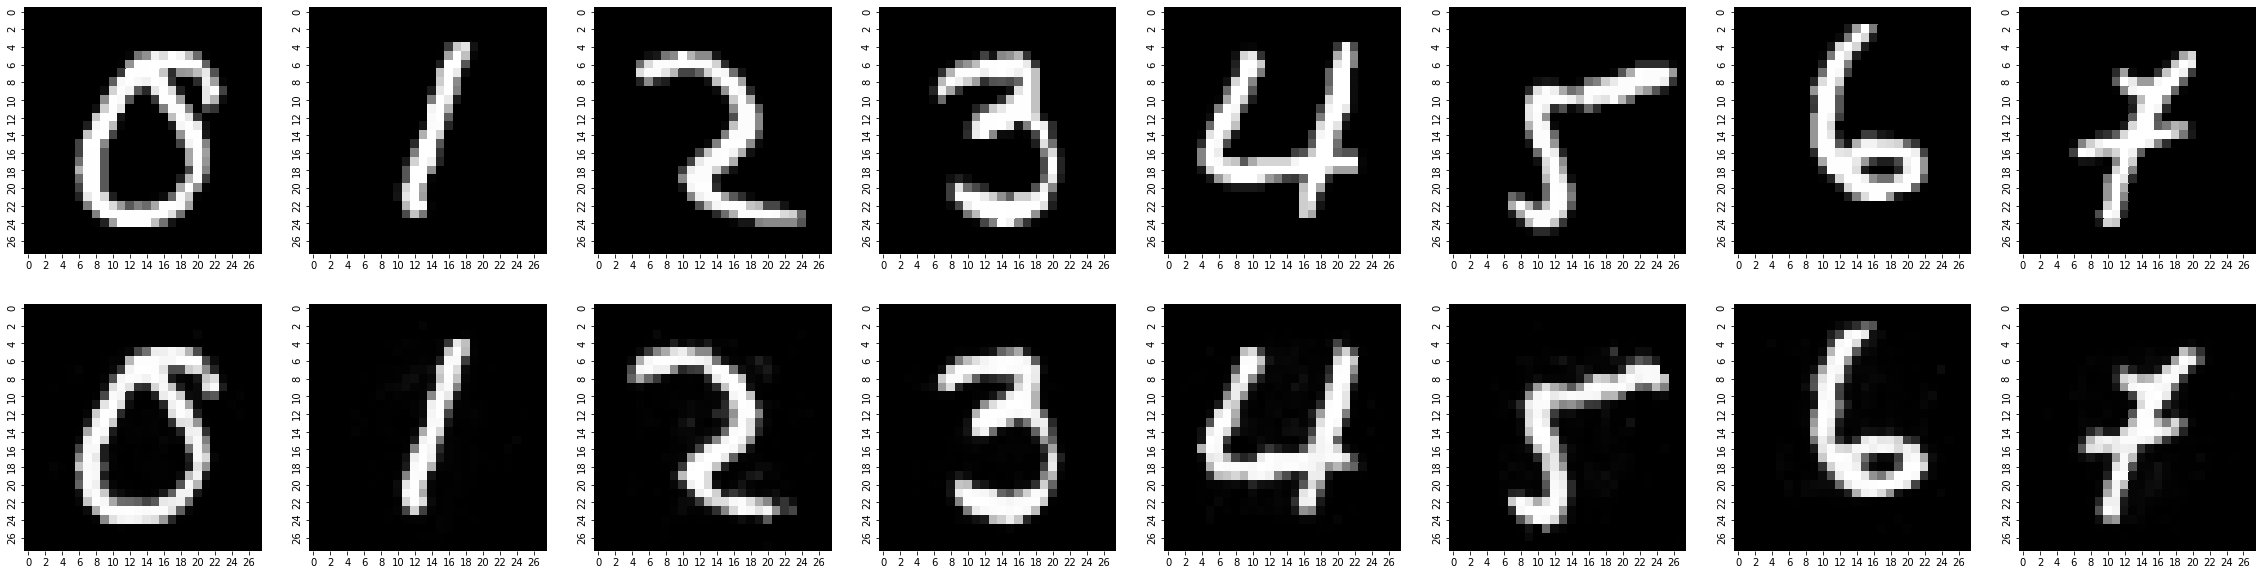

In [20]:
True_values=[]
Pred_values=[]
df_true=[]
df_pred=[]
df=[]
fig = plt.figure(figsize=(40,10))

for i in range(0, 8):
    Pred_values.append(np.reshape(y_test_digits[ i ,:],(28,28)))
    True_values.append(np.reshape(test_out_digits[ i ,:],(28,28)))
for i in range(0, 8):
    df_true.append(pd.DataFrame(True_values[i].T))
    df_pred.append(pd.DataFrame(Pred_values[i].T))
df=df_true+df_pred
for i in range(1 , len(df)+1):
    plt.subplot(2 , 8 , i)
    sns.heatmap(df[i-1], cmap="gray", cbar=False)


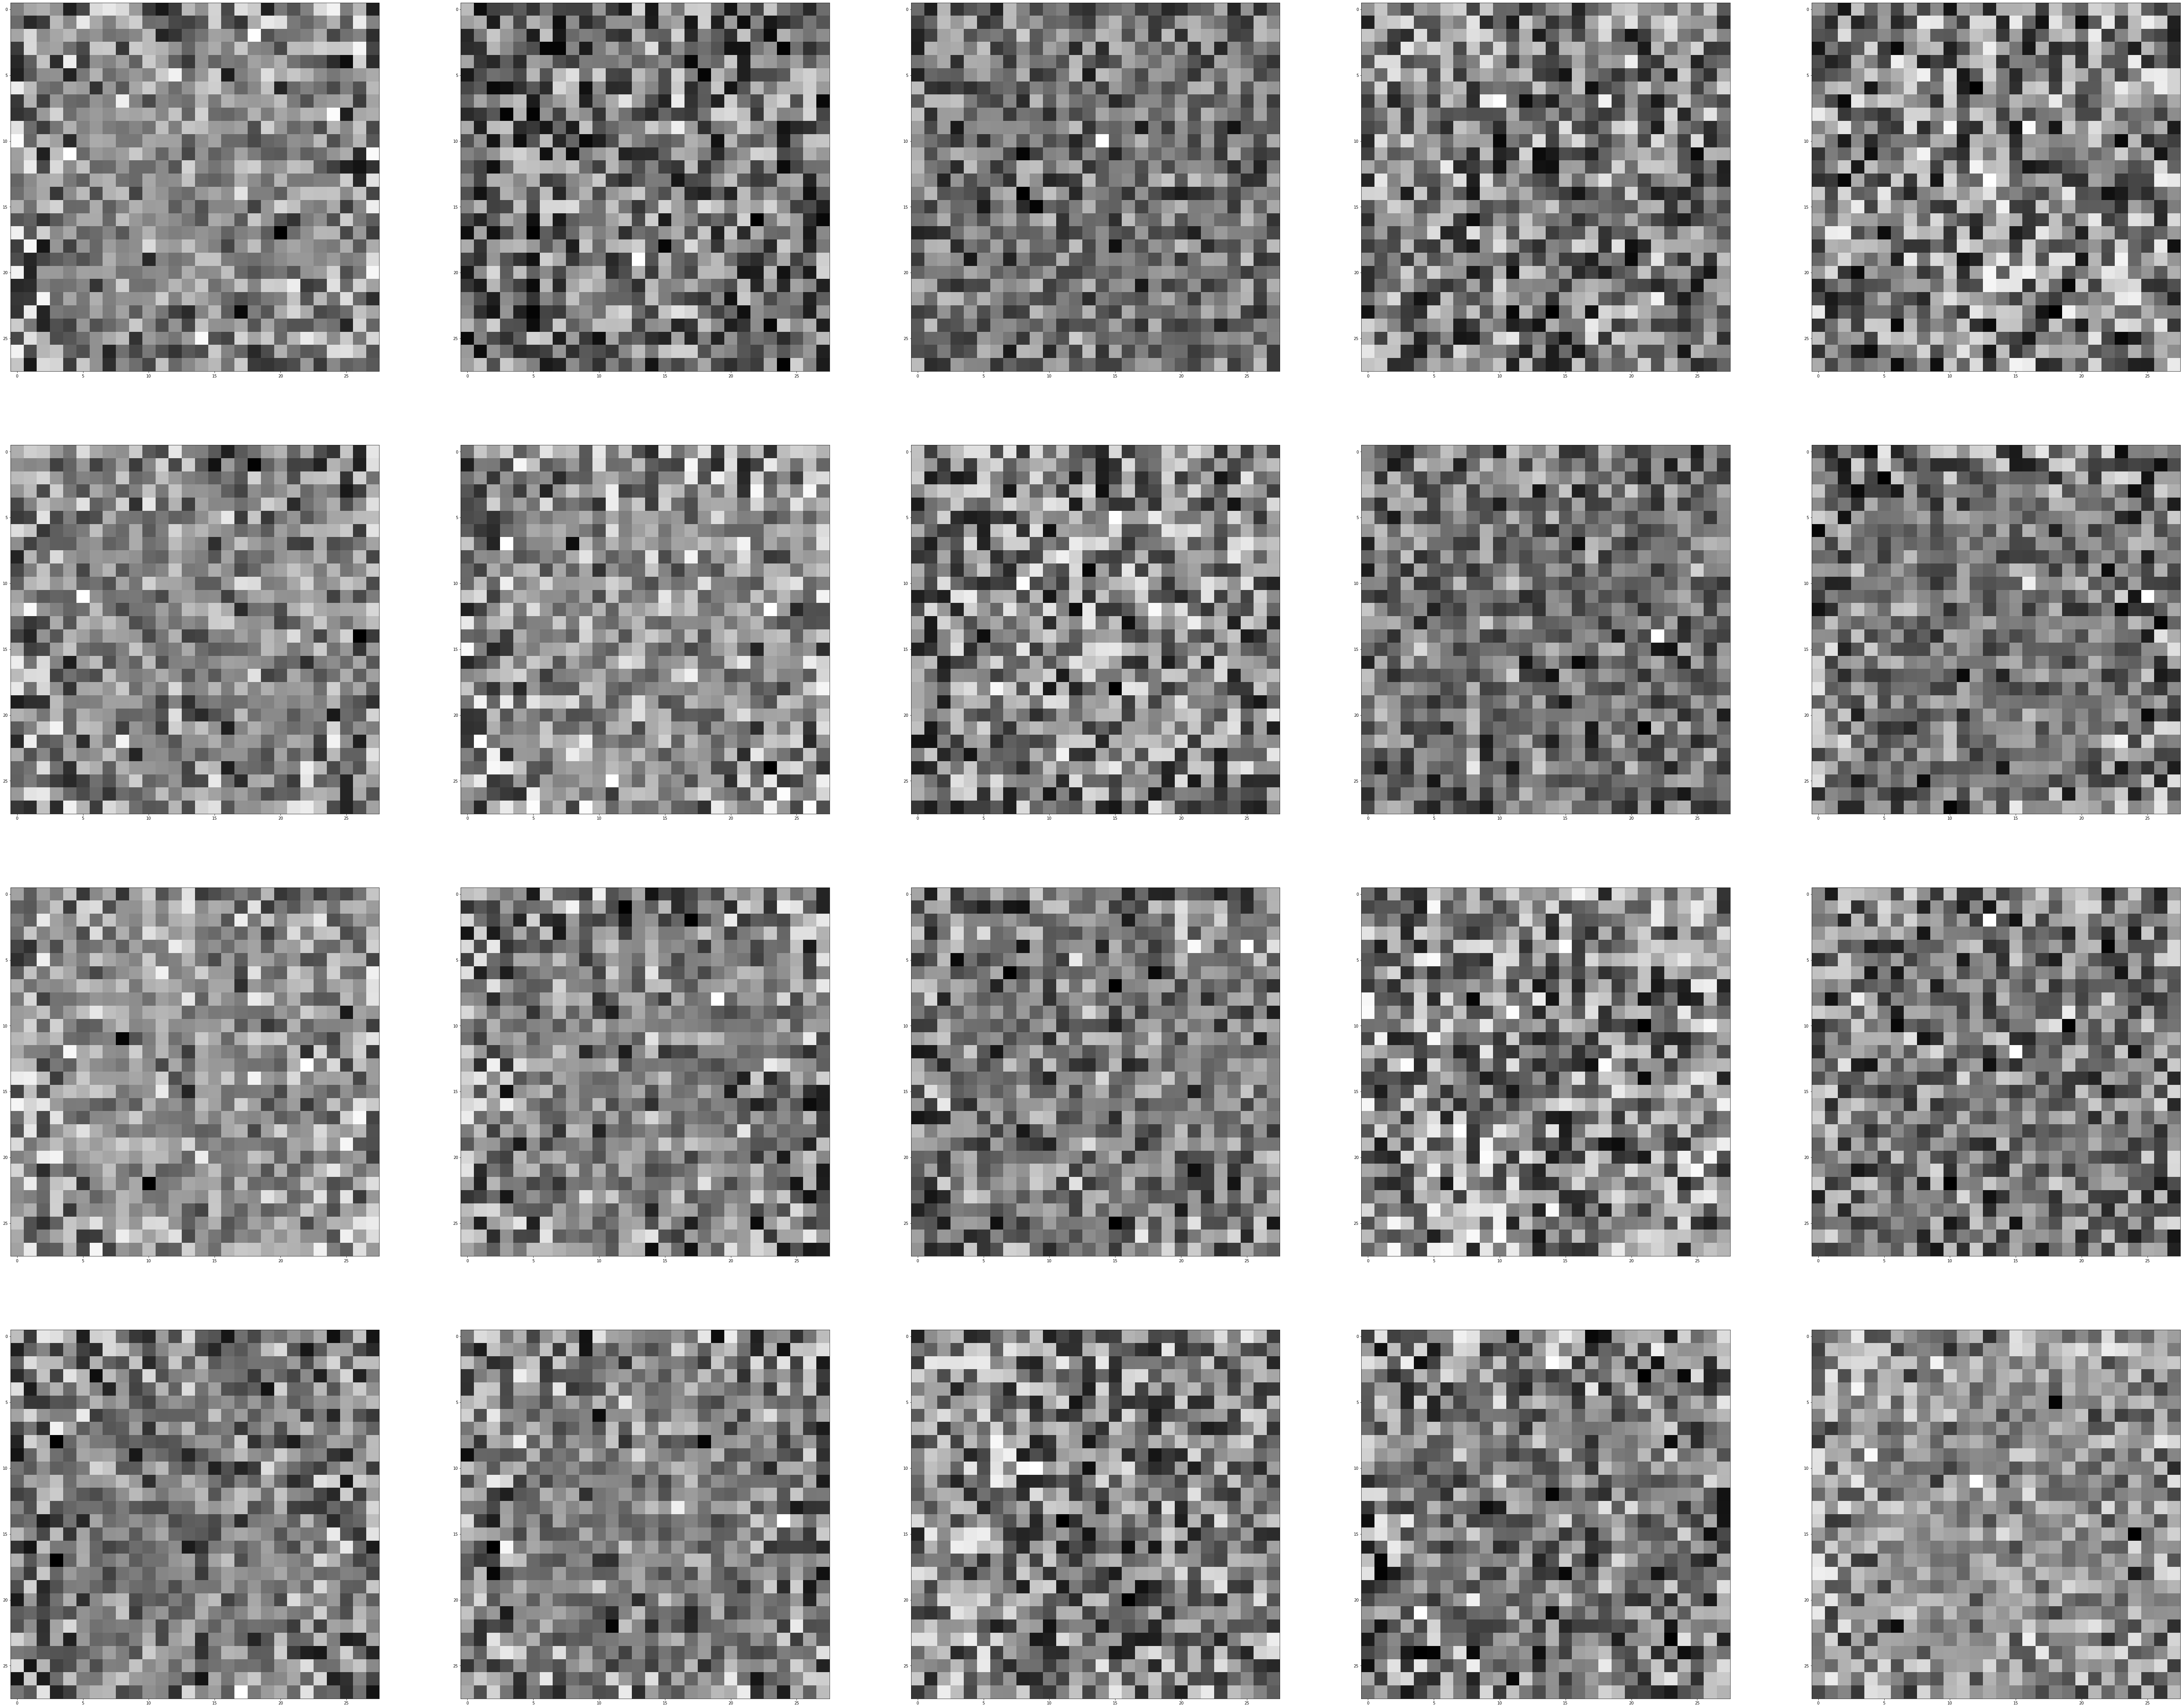

In [16]:
#Weight Heatmaps
Weights_map = Weights_Train[0]
Weights_map = Weights_map[1:,:].T
Weights_x = Weights_map[0,:]
for i in range(6,120,6):
    Weights_x = np.vstack((Weights_x,Weights_map[i,:]))
fig = plt.figure(figsize = (100,80))
for i in range(0,20):
    temp = Weights_x[i].reshape(28,28).T
    plt.subplot(4,5,i+1)
    df = pd.DataFrame(temp)
    plt.imshow(df, cmap='gray', interpolation='nearest')

plt.show()


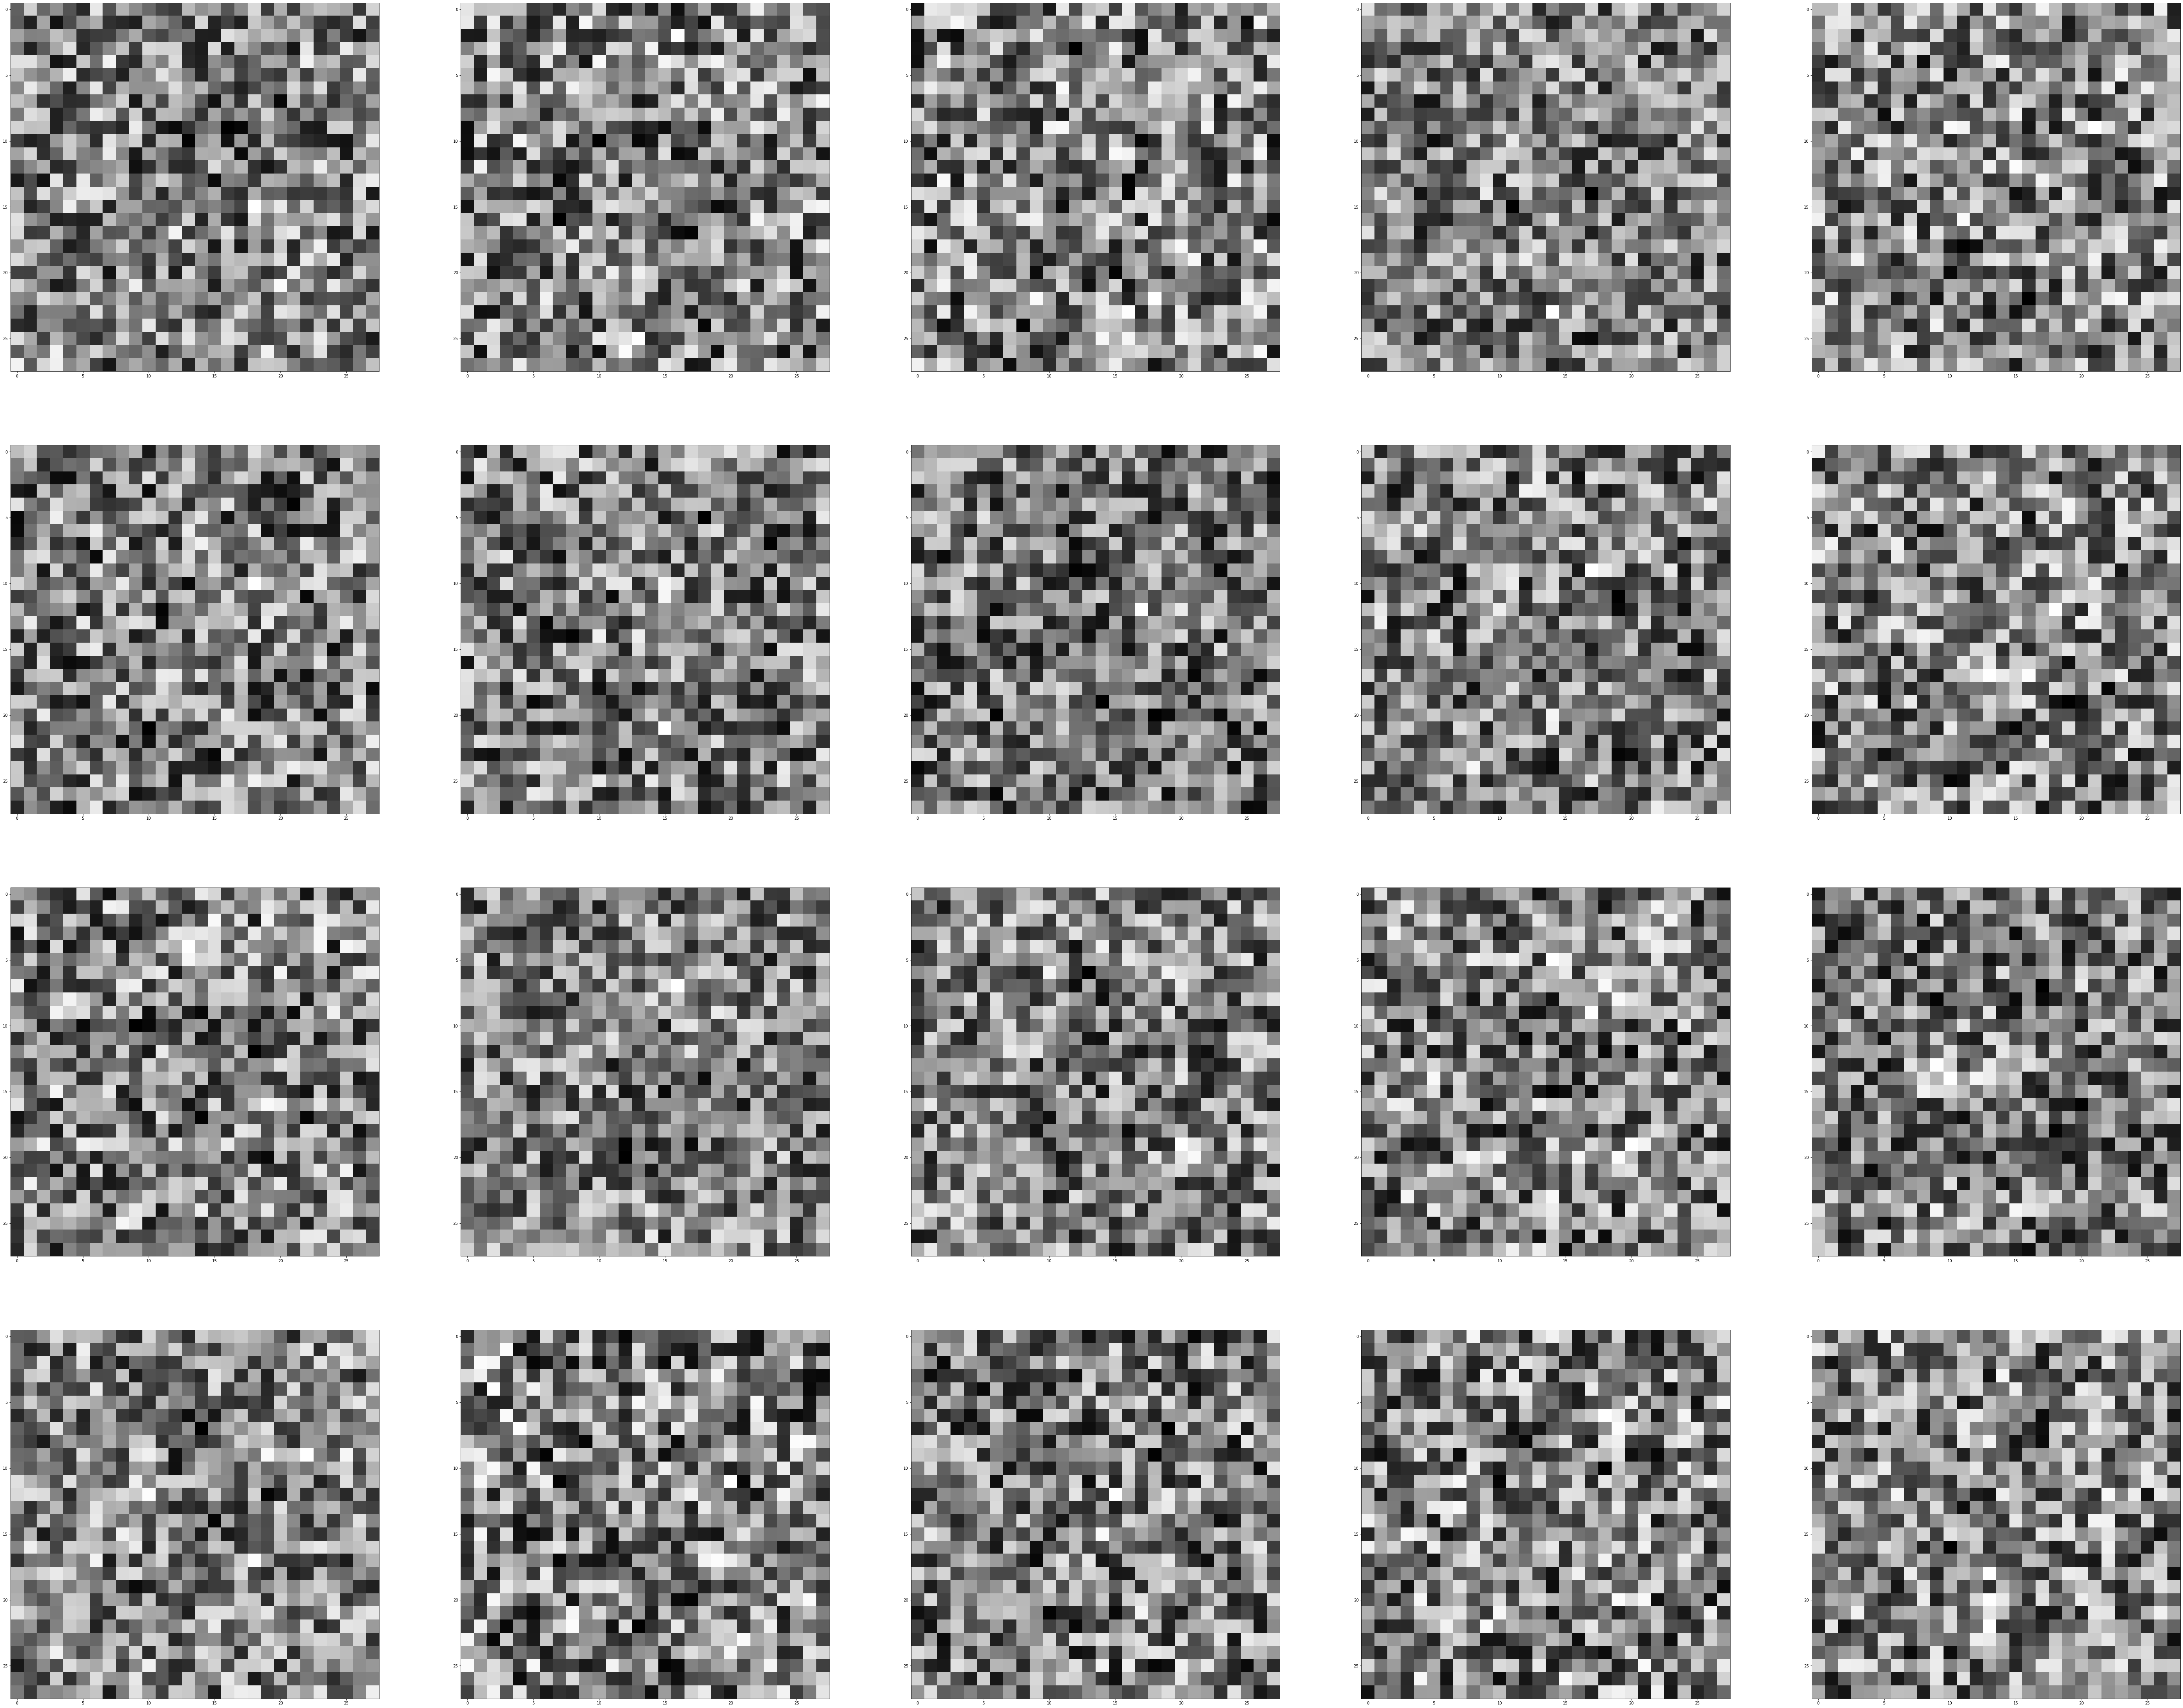

In [19]:
Weights_saved=np.load('saved_weights.npy',allow_pickle=True)
Weights_map = Weights_saved[0]
Weights_map = Weights_map[1:,:].T
Weights_x = Weights_map[0,:]
for i in range(6,120,6):
    Weights_x = np.vstack((Weights_x,Weights_map[i,:]))
fig = plt.figure(figsize = (100,80))
for i in range(0,20):
    temp = Weights_x[i].reshape(28,28).T
    plt.subplot(4,5,i+1)
    df = pd.DataFrame(temp)
    plt.imshow(df, cmap='gray', interpolation='nearest')

plt.show()
